#  Code for 2D staggered Lagrangian method in Cartersian coordinates

## Control equations

### Momentum equation

$$\tag{1.1}\rho \frac{d\mathbf{v}}{dt} =  -\nabla p $$ 
where $\mathbf{v}$ is the vector of velocity, and $\rho$ is the density and $p$ is the pressure.  

### Energy equation

$$ \rho \frac{dE}{dt} = -\nabla \cdot (p\mathbf{v})$$ 

where $E$ is the specific total energy and it has a realtion with the specific internal energy 
$$E = e + \frac{1}{2}\mathbf{v}\cdot\mathbf{v}$$

By (1.1) and (1.2) we have 
$$\tag{1.3} \rho \frac{de}{dt} = - p\nabla\cdot \mathbf{v}$$

In  a Cartersian coordinates $x-y$, The equations (1.1) and (1.3) can be written as
$$\rho \frac{du}{dt} = -\frac{\partial p}{\partial x},\quad \rho \frac{dv}{dt} = -\frac{\partial p}{\partial y}$$
and
$$\rho \frac{de}{dt} = -p (\frac{\partial u}{\partial x} +\frac{\partial v}{\partial y})$$

## Compatible Staggered Discretization

<img src="Grid.png" width = "800" height = "400" div align=center /> 

<img src="cellpoint.png" width = "800" height = "400" div align=center />

### Quatities:

On point: ($x_p$,$y_p$), ($u_p$,$v_p$)

Zonal:  $V_z$, $\rho_z$, $m_z$, $e_z$, $p_z$

By the relation 
$$\frac{dm_z}{dt} =0$$
we have 
$$\rho_z(t) = m_z/V_z(t)$$

Also 
$$d(x_p)/dt = u_p, \quad d(y_p)/dt = v_p$$

### Point mass 

Point mass $m_p$ is used to solve point momentum $\mu_p = m_p \bf{u}_p$ and kinetic energy $K_p = m_p \frac{\bf{u}_p^2}{2}$

<img src="Ins.jpg" width = "200" height = "400" div align=center /> 

$$m_p = \sum_{z\in Z(p)} A_z^p \rho^p_z$$

$$\rho_z(t) = m_z/V_z(t)$$

In [2]:
function MassAndDens(mz::Array{Float64,1},x::Array{Float64,1},y::Array{Float64,1})
    
    Ic, = size(mz)
    Ip, = size(Tc)
    Asbz = zeros(Float64,4)
    ρ = zeros(Float64,Ic)
    mp = zeros(Float64,Ip)
    xz = zeros(Float64,4)
    yz = zeros(Float64,4)
    for i in 1:Ic
        xz[1:4] = x[Tp[i,1:4]]
        yz[1:4] = y[Tp[i,1:4]]
        Asbz = A_z(xz,yz)
        Az = sum(Asbz)
        ρ[i] = mz[i]/Az
        
        for j = 1:4
            ip = Tp[i,j]
            mp[ip] = mp[ip] + Asbz[j]*ρ[i]
        end
    end
   # @show mp
    return ρ,mp
    
   
end           
        

MassAndDens (generic function with 1 method)


$$ A_z^1 = \frac{5A_{41}+5A_{12}+A_{23}+A_{34}}{12}$$
$$ A_z^2 = \frac{A_{41}+5A_{12}+5A_{23}+A_{34}}{12}$$
$$ A_z^3 = \frac{A_{41}+A_{12}+5A_{23}+5A_{34}}{12}$$
$$ A_z^4 = \frac{5A_{41}+A_{12}+A_{23}+5A_{34}}{12}$$

In [3]:
function A_z(xz::Array{Float64,1},yz::Array{Float64,1}) 
    A =zeros(Float64,4)
    xc= sum(xz[i] for i in 1:4)/4
    yc= sum(yz[i] for i in 1:4)/4
    
    A41 = Area3(xz[4],xz[1],xc,yz[4],yz[1],yc)
    A12 = Area3(xz[1],xz[2],xc,yz[1],yz[2],yc)
    A23 = Area3(xz[2],xz[3],xc,yz[2],yz[3],yc)
    A34 = Area3(xz[3],xz[4],xc,yz[3],yz[4],yc)

    A[1] = (5A41+5A12+A23+A34)/12
    A[2] = (A41+5A12+5A23+A34)/12
    A[3] = (A41+A12+5A23+5A34)/12
    A[4] = (5A41+A12+A23+5A34)/12
    
    

    return A
end

A_z (generic function with 1 method)

<img src="n1234.png" width = "300" height = "300" div align=center />

$$\overrightarrow{n}_{12} = \frac{1}{L_{12}}(y_1- y_2, x_2-x_1)  $$

$$ \mathbf{F_1}  = \frac{1}{2} ( p \cdot \overrightarrow{n}_{12}L_{12} + p\cdot \overrightarrow{n}_{41}L_{41}) $$ 

$$ \mathbf{F_1}  = \frac{1}{2}  p \left[ (y_1 - y_2, x_2 -x_1) + (y_4 -y_1, x_1 - x_4) \right] $$ 

In [29]:
function F_z(x::Array{Float64,1},y::Array{Float64,1},p::Float64)
   
    Fx = zeros(Float64,4)
    Fy = zeros(Float64,4)
    
   # L12 = √((x[2]-x[1])^2+(y[2]-y[1])^2)
    n12x = -y[2]+y[1]
    n12y = x[2]-x[1]
    
  #  L41 = √((x[1]-x[4])^2+(y[1]-y[4])^2)
    n41x = -y[1]+y[4]
    n41y =  x[1]-x[4]
    
   # L23 = √((x[3]-x[2])^2+(y[3]-y[2])^2)
    n23x = -y[3]+y[2]
    n23y =  x[3]-x[2]
    
  #  L34 = √((x[4]-x[3])^2+(y[4]-y[3])^2)
    n34x = -y[4]+y[3]
    n34y =  x[4]-x[3]
    
    Fx[1] = p*(n12x+n41x)/2
    Fy[1] = p*(n12y+n41y)/2
    
    Fx[2] = p*(n12x+n23x)/2
    Fy[2] = p*(n12y+n23y)/2
    
    Fx[3] = p*(n23x+n34x)/2
    Fy[3] = p*(n23y+n34y)/2
    
    Fx[4] = p*(n34x+n41x)/2
    Fy[4] = p*(n34y+n41y)/2
    
    return Fx,Fy
end           

F_z (generic function with 1 method)

对于单元 
$$ \frac{d e}{d t} = -\frac{p}{\rho}\nabla \cdot \mathbf{u}$$ 
在单元上做积分

$$ m_z \frac{de_z}{dt} = \sum_{z\in Z(p)} \bf{F}_z^p \cdot \bf{u}_p $$  

对于节点
$$ \rho \frac{d \mathbf{u}}{dt} = - \nabla p$$

$$m_p \frac{d\bf{u}_p}{dt} = -\sum_{p\in P(z)} \bf{F}_z^p$$

$$F_z^1 = \mathbf{F}_1 - c\mathbf{e}_1$$

In [67]:
function Rhs(x::Array{Float64,1},y::Array{Float64,1},u::Array{Float64,1},v::Array{Float64,1},p::Array{Float64,1})  #Right hand e
    Ic, = size(Tp)
    Ip, = size(Tc)
    rhsu = zeros(Float64,Ip)
    rhsv = zeros(Float64,Ip) 
    rhse = zeros(Float64,Ic)
    xz = zeros(Float64,4)
    yz = zeros(Float64,4)
    
    for i in 1:Ic
        for j =1:4
            xz[j] = x[Tp[i,j]]
            yz[j] = y[Tp[i,j]]
        end
        Fx,Fy = F_z(xz,yz,p[i])
        
        ∑=0
        for j in 1:4
            ip = Tp[i,j]
            ∑ = ∑ +u[ip]*Fx[j] + v[ip]*Fy[j]
        end
        rhse[i] = ∑
        
        for j = 1:4
            ip = Tp[i,j]
            rhsu[ip] +=  -Fx[j]
            rhsv[ip] +=  -Fy[j]
        end     
    end
    return rhse, rhsu,rhsv
end

Rhs (generic function with 1 method)

In [287]:
function Euler1st(dt,u,v,x,y,p,mz,ρ,α)
    Ip, = size(u)
    Ic, = size(p)
    
    ρ,mp = MassAndDens(mz,x,y)
   
 #   @show mp
    
    e = pToe(p, ρ,problem.γ)
    
    p = artificial_viscosity!(p,ρ,x,y,u,v,α)
    
    rhse, rhsu,rhsv = Rhs(x,y,u, v, p)
    
    rhsu,rhsv = Bound(rhsu,rhsv,x,y,u, v, p)
    
    x  +=  dt*u
    y  +=  dt*v
    u  += dt*(rhsu ./ mp)
    v  += dt*(rhsv ./ mp)
    e  += dt*(rhse ./ mz)
    

    ρ,mp = MassAndDens(mz,x,y)
    
    p = eTop(e, ρ,problem.γ)
    return u,v,x,y,p,ρ
end

Euler1st (generic function with 1 method)

In [361]:
function predictor_corrector2nd(dt,u,v,x,y,p,mz,ρ,α)
    Ip, = size(u)
    Ic, = size(p)
    
    ρ,mp = MassAndDens(mz,x,y)
    e = pToe(p, ρ,problem.γ)  
    p = artificial_viscosity!(p,ρ,x,y,u,v,α)
    
    rhse, rhsu,rhsv = Rhs(x,y,u, v, p)
    
    rhsu,rhsv = Bound(rhsu,rhsv,x,y,u, v, p)
    
    x₀ =  x + dt*u
    y₀  = y + dt*v
    u₀  = u + dt*(rhsu ./ mp)
    v₀  = v + dt*(rhsv ./ mp)
    e₀  = e + dt*(rhse ./ mz)
    

    ρ,mp = MassAndDens(mz,x₀,y₀)
    p = eTop(e₀, ρ,problem.γ)   
    
    p = artificial_viscosity!(p,ρ,x₀,y₀,u₀,v₀,α) 
    rhse₀,rhsu₀,rhsv₀ = Rhs(x₀,y₀,u₀, v₀, p)
    rhsu₀,rhsv₀ = Bound(rhsu₀,rhsv₀,x₀,y₀,u₀, v₀, p)
    
    x +=  0.5dt*(u + u₀)
    y +=  0.5dt*(v + v₀)
    u +=  0.5dt*(rhsu + rhsu₀) ./ mp
    v +=  0.5dt*(rhsv + rhsv₀) ./ mp
    e +=  0.5dt*(rhse + rhse₀)  ./ mz
    
    ρ,mp = MassAndDens(mz,x,y)
    p = eTop(e₀, ρ,problem.γ) 
    
    return u,v,x,y,p,ρ
end

predictor_corrector2nd (generic function with 1 method)

In [383]:
function Bound(rhsu,rhsv,x,y,u,v,p)
    Ip, = size(Tc)
    Ib, = size(Tb)
    xz = zeros(Float64,4)
    yz = zeros(Float64,4)
    for i in 1:Ib
        ip = Tb[i,1]
    #    @show ip
        for j = 1:4
            ic = Tc[ip,j]
            if ic != 0
                xz[1:4] = x[Tp[ic,1:4]]
                yz[1:4] = y[Tp[ic,1:4]]
                if Tb[i,2] ==1
                    Fx,Fy = F_zB(xz,yz,p[ic],j,1)
                    rhsu[ip] +=  Fx
                    rhsv[ip] += Fy
                   # mp[ip] *= 2.0
                elseif Tb[i,2] == 2  #boundary in y
                    Fx,Fy = F_zB(xz,yz,p[ic],j,1)
                    rhsu[ip] += Fx
                    rhsv[ip] += Fy
                    v[ip] = 0
                end
                if Tb[i,3] ==1
                    Fx,Fy = F_zB(xz,yz,p[ic],j,2)
                    rhsu[ip] += Fx
                    rhsv[ip] += Fy
                   # mp[ip] *= 2.0
                elseif Tb[i,3] ==2  #boundary in x
                   
                end
            end
        end
    end
    return rhsu, rhsv
end  

Bound (generic function with 1 method)

### Boundary force

If one edge of a cell is a free boundary, then $f$ on the points is zero. As we have add it in RHs(), we need to remove it by resolve it again. Different from RHs(), at every point of a cell the force is composited by two parts on different edges. This is distinguished by $k$ when $k = 1$ the boundary is on y direction, forces on 12 and 34 boundary must be subtracted. When $ k =2$ the boundary is on x direction, subtract forces on 41, 23. 

In [11]:
function F_zB(x::Array{Float64,1},y::Array{Float64,1},p::Float64,j::Int,k::Int)
    Fx = 0.0
    Fy = 0.0      
    if k==1 # y direction 
     #   L12 = √((x[2]-x[1])^2+(y[2]-y[1])^2)
        n12x = -y[2]+y[1]
        n12y = x[2]-x[1]
     #   L34 = √((x[4]-x[3])^2+(y[4]-y[3])^2)
        n34x = -y[4]+y[3]
        n34y = x[4]-x[3]
        if j == 1  #Point 1
            Fx = p*n12x/2
            Fy = p*n12y/2
        elseif j == 2 
            Fx = p*n12x/2
            Fy = p*n12y/2
        elseif j == 3
            Fx = p*n34x/2
            Fy = p*n34y/2
        else 
            Fx = p*n34x/2
            Fy = p*n34y/2
        end
    elseif k == 2
      #  L41 = √((x[1]-x[4])^2+(y[1]-y[4])^2)
        n41x = -y[1]+y[4]
        n41y =  x[1]-x[4]

       # L23 = √((x[3]-x[2])^2+(y[3]-y[2])^2)
        n23x = -y[3]+y[2]
        n23y = x[3]-x[2]
        if j == 1
            Fx = p*n41x/2
            Fy = p*n41y/2
        elseif j == 2 
            Fx = p*n23x/2
            Fy = p*n23y/2
        elseif j == 3
            Fx = p*n23x/2
            Fy = p*n23y/2
        else 
            Fx = p*n41x/2
            Fy = p*n41y/2
        end
    end
    return Fx,Fy
    end           

F_zB (generic function with 1 method)

### EOS 
$$ e = \frac{p}{(\gamma-1)\rho}$$

In [12]:
function pToe(p,ρ,γ)
    return p ./ ρ/(γ-1)
end
function eTop(e,ρ,γ)
    return (γ-1)*ρ .* e
end

eTop (generic function with 1 method)

In [13]:
function CFL(SF,x::Array{Float64,1},y::Array{Float64,1},
                u::Array{Float64,1},v::Array{Float64},
                p::Array{Float64,1},ρ::Array{Float64,1})
    Ic, = size(ρ)
    cflmin = 1.e9
      cfl = 0 
    γ = problem.γ
    for i in 1:Ic
        cfl =0
        u2max = 0
        u2=0.0
        for j = 1:4
            ip = Tp[i,j]
            u2 = u[ip]^2+v[ip]^2
            if u2 > u2max ; u2max = u2; end
        end
        
        dlmin = (x[Tp[i,4]] - x[Tp[i,1]])^2+(y[Tp[i,4]]-y[Tp[i,1]])^2
        for j=1:3
            dl= (x[Tp[i,j+1]] - x[Tp[i,j]])^2+(y[Tp[i,j+1]]-y[Tp[i,j]])^2
            if dl < dlmin; dlmin=dl; end
        end
        c = √(γ*p[i]/ρ[i])
        cfl = √(dlmin)/(√(u2max)+c)
        if cfl < cflmin; cflmin = cfl; end
    end
 #   @show cflmin
    dt = cflmin*SF
    return dt
end 
        

CFL (generic function with 1 method)

In [355]:
function TimeSolve(u,v,x,y,p,mz,ρ,α)
    tt= problem.tt
    sf =problem.sf
    t= 0.0
    t₁ = tt/100
    t₂ = t₁
    while t<tt   
#for i in 1:50
        dt=CFL(sf,x,y,u,v,p,ρ)
        if t+dt>tt
           dt = tt-t
        end
        
        u,v,x,y,p,ρ = predictor_corrector2nd(dt,u,v,x,y,p,mz,ρ,α)
        t += dt
        if t > t₁
            println(t)
            t₁ += t₂
        end
    end
#
    return u,v,x,y,p,ρ
end

TimeSolve (generic function with 1 method)

## Artificial Viscosity 

Wilkins（1980） use the strain rate along the direction of cell acceleration to construct the artificial viscosity 
$$\frac{ds}{dt} = \frac{\partial u}{\partial x} \text{cos}^2 \alpha + \frac{\partial v}{\partial y} \text{sin}^2\alpha +(\frac{\partial u}{\partial y} + \frac{\partial v}{\partial x})\text{sin} \alpha \text{cos} \alpha$$


Then the artificial viscosity can be written as
$$ q_w = \left\{ \begin{align}
l_0^2 \rho \left( \frac{ds}{dt} \right)^2 +  l_L\rho c \left|\frac{ds}{dt}\right|, \quad \text{if}  \quad \frac{ds}{dt}< 0,\\
0, \quad \text{if} \quad \frac{ds}{dt}\ge 0. \\
\end{align}
\right.
$$
where $l_0 = a_0L$, $l_L = a_L L$, $a_0 \approx 2$, $a_L \approx 1$ and $c$ is the sonic speed.

$L$ is the reference length, and constructed as
$$L = \frac{2A}{d_1 + d_2 +d_3 +d_4} $$


<img src="L1.png" width = "400" height = "300" div align=center />

In [379]:
function artificial_viscosity_c!(p,ρ,x,y,u,v,α)
    γ = problem.γ
    xc = sum(x[i] for i in 1:4)/4
    yc = sum(y[i] for i in 1:4)/4
    
    ∂u_∂x,∂u_∂y,∂v_∂x,∂v_∂y = ∂uv(x,y,u,v)
    
    ds_dt = ∂u_∂x*cosd(α)^2 +∂v_∂y*sind(α)^2 + (∂u_∂y+∂v_∂x)*sind(α)*cosd(α)
    
    L = l_viscosity(x,y,α)
    a₀ = 2; aₗ = 1
    c = √(γ*p/ρ)
    l₀ = a₀*L
    lₗ = aₗ*L
    
    L = 1/2*(√((x[3] - x[1])^2+(y[3] - y[1])^2) +√((x[2] - x[4])^2+(y[2] - y[4])^2) )  
    
   # if ds_dt > 0
    if ∂u_∂x > 0
        q = 0
    else
        #q = l₀^2*ρ*(ds_dt)^2 +lₗ*ρ*c*abs(ds_dt)
        q = 0.8ρ*L*c*abs(∂u_∂x) +1.2L^2*ρ*(∂u_∂x)^2 
    end
    return p+q
end

artificial_viscosity_c! (generic function with 1 method)

$$b_2 \rho Lc \frac{\partial u}{\partial x} - b_{12}\rho L^2 \left(\frac{\partial u}{\partial x}\right)^2$$

In [16]:
function artificial_viscosity!(p,ρ,x,y,u,v,α)
    I, = size(Tp)
    
    xc = zeros(Float64,4)
    yc = zeros(Float64,4)
    uc = zeros(Float64,4)
    vc = zeros(Float64,4)
    for i in 1:I
        for j in 1:4
            ip = Tp[i,j]
            xc[j] = x[ip]
            yc[j] = y[ip]
            uc[j] = u[ip]
            vc[j] = v[ip]
        end
        p[i] = artificial_viscosity_c!(p[i],ρ[i],xc,yc,uc,vc,α[i])
    end
    
        return p
        
    end       

artificial_viscosity! (generic function with 1 method)

In [17]:
function l_viscosity(x,y,α)
    xc = sum(x)/4; yc = sum(y)/4
    d = zeros(Float64,4)
    for i in 1:4
    d[i] = distance(x[i],y[i],xc,yc,α)
    end
    A = A_z(x, y)
    L = 2sum(A)/sum(d)
    return L
end

l_viscosity (generic function with 1 method)

#### distance from  Point to line 
Line: $$ (xc -cos \alpha )(x-xc) = (yc-sin \alpha)(y-yc)$$
point: $x,y$

In [18]:
function distance(x,y,xc,yc,α)
    d = abs((xc - cosd(α)) * (x .-xc)- (yc-sind(α))*(y .- yc))/√((xc-cosd(α))^2+(yc-sind(α))^2)
    return d
end

distance (generic function with 1 method)

### 沙漏粘性

$$ \text{hg}_x = u_1 -u_2 + u_3 - u_4$$ 
$$ \text{hg}_x = v_1 -v_2 + v_3 - v_4$$ 

$$ e_{1x} = -\frac{1}{4}q\rho\sqrt{A}\text{hg}_x $$
$$ e_{1y} = -\frac{1}{4}q\rho\sqrt{A}\text{hg}_y $$

$$ e_{2x} = \frac{1}{4}q\rho\sqrt{A}\text{hg}_x $$
$$ e_{2y} = \frac{1}{4}q\rho\sqrt{A}\text{hg}_y $$

$$ e_{3x} = -\frac{1}{4}q\rho\sqrt{A}\text{hg}_x $$
$$ e_{3y} = -\frac{1}{4}q\rho\sqrt{A}\text{hg}_y $$

$$ e_{4x} = \frac{1}{4}q\rho\sqrt{A}\text{hg}_x $$
$$ e_{4y} = \frac{1}{4}q\rho\sqrt{A}\text{hg}_y $$

In [19]:
struct prb
    tt::Float64
    sf::Float64
    γ ::Float64
end

In [20]:
function Area3(x1,x2,x3,y1,y2,y3)
    return abs((x1*y2+y1*x3+x2*y3-x1*y3-y1*x2-y2*x3)/2)
end

Area3 (generic function with 1 method)

###  $\frac{\partial (u,v)}{\partial (x,y)}$

we use the diffences between 1 and 3 points and 2 and 4 points to solve the partial differences approximately, as
$$ \frac{\partial u}{\partial x}  \approx \frac{1}{2}\frac{u_3-u_1}{x_3-x_1}+\frac{1}{2}\frac{u_4-u_2}{x_4-x_2}$$ 
Similar process to $\frac{\partial u}{\partial y}$,$\frac{\partial v}{\partial x}$ and $\frac{\partial v}{\partial y}$

In [78]:
function ∂uv(x,y,u,v)
    ∂u_∂x = 0.5(u[3]-u[1])/(x[3]-x[1]) + 0.5(u[2]-u[4])/(x[2]-x[4])
    ∂v_∂x = 0.5(v[3]-v[1])/(x[3]-x[1]) + 0.5(v[2]-v[4])/(x[2]-x[4])
    ∂u_∂y = 0.5(u[3]-u[1])/(y[3]-y[1]) + 0.5(u[4]-u[2])/(y[4]-y[2])
    ∂v_∂y = 0.5(v[3]-v[1])/(y[3]-y[1]) + 0.5(v[4]-v[2])/(y[4]-y[2])
    return ∂u_∂x,∂u_∂y,∂v_∂x,∂v_∂y
end

∂uv (generic function with 1 method)

In [295]:
using DelimitedFiles
function Output(Ix,Iy,x,y,u,v,p,ρ,mz)

    Ip, = size(Tc)
    Ic, = size(Tp)
    io = open("data.dat", "w+")
    A = zeros(Float64,Ip,6)
   # for i in 1:Ip
    
    text = " TITLE = \"Dataset\"
VARIABLES = \"x\" \"y\" \"u\" \"v\" \"rho\" \"p\"  ZONE T=\"Zone 1\" 
I=$Ix,J=$Iy,K=1,ZONETYPE=Ordered 
DATAPACKING=POINT \n "
  #  write(1,*)
    write(io,text)

    for i in 1:Ip
        nc = 0
        ρz = 0.0
        pz = 0.0
        for j = 1:4
            ic = Tc[i,j] 
            if ic != 0
                ρz += ρ[ic]
                pz += p[ic]
                nc +=  1
            end
        end
        ρz = ρz/nc
        pz = pz/nc
        A[i,1] = x[i]
        A[i,2] = y[i]
        A[i,3] = u[i]
        A[i,4] = v[i]
        A[i,5] = ρz
        A[i,6] = pz
        
    end
    writedlm(io, A, "  ")
    close(io)
end

Output (generic function with 2 methods)

In [27]:
using DelimitedFiles
function Output1(x,y,rhs)

    Ip, = size(Tc)
    Ic, = size(Tp)
    io = open("data1.dat", "w+")
    A = zeros(Float64,Ip,3)
   # for i in 1:Ip
    
    text = " TITLE = \"Dataset\"
VARIABLES = \"x\" \"y\" \"p\"  ZONE T=\"Zone 1\" 
I=400,J=40,K=1,ZONETYPE=Ordered 
DATAPACKING=POINT \n "
  #  write(1,*)
    write(io,text)

    for i in 1:Ic
        nc = 0
        ρz = 0.0
        pz = 0.0
        ip  = Tp[i,1]
        A[i,1] = x[ip]
        A[i,2] = y[ip]
        A[i,3] = rhs[i]
        
    end
    writedlm(io, A, "  ")
    close(io)
end

Output1 (generic function with 1 method)

In [24]:
using DelimitedFiles
function Output2(x,y,rhs)

    Ip, = size(Tc)
    Ic, = size(Tp)
    io = open("data1.dat", "w+")
    A = zeros(Float64,Ip,3)
   # for i in 1:Ip
    
    text = " TITLE = \"Dataset\"
VARIABLES = \"x\" \"y\" \"p\"  ZONE T=\"Zone 1\" 
I=401,J=41,K=1,ZONETYPE=Ordered 
DATAPACKING=POINT \n "
  #  write(1,*)
    write(io,text)

    for i in 1:Ip
        nc = 0
        ρz = 0.0
        pz = 0.0
       # ip  = Tp[i,1]
        A[i,1] = x[i]
        A[i,2] = y[i]
        A[i,3] = rhs[i]
        
    end
    writedlm(io, A, "  ")
    close(io)
end

Output2 (generic function with 1 method)

In [105]:
function outputline(Ix,Iy,x,y,u,v,ρ,p,mz)
    I, = size(ρ)
    
    uL =  zeros(Float64,Ix)
    xL =  zeros(Float64,Ix)
    vL =  zeros(Float64,Ix)
    ρL =  zeros(Float64,Ix)        
    pL =  zeros(Float64,Ix)  
            
    for i in 1:Ix
        j = Int8(floor(Iy/2))
            ip = i+(j-1 ) *(Ix+1)
            ic =i+(j-1)*Ix
            uL[i] = u[ip]
            xL[i]  = x[ip]
            vL[i] = v[ip]
            ρL[i]  = ρ[ic]
            pL[i] = p[ic]
    end
    return xL,uL,vL,ρL,pL
end

outputline (generic function with 1 method)

### noh 算例 

In [57]:
@inline function InitTest1()

    global problem = prb(0.1,0.3,1.4)
     
    I = 200
    J = 20
    dx = 1.0/I
    dy = 0.1/J
    
    
    Ip = (I+1)*(J+1) # Number of  points
    Ic = I*J  # number of cells
    
    global Tp = zeros(Int,Ic,4) #格点
    global Tc = zeros(Int,Ip,4) #点格
    
    #@show Tc, Ip
    global Tb = zeros(Int, I*2+J*2,3) #边界 
    
    IBL = J+1
    IBR = J+1
    IBU = I+1
    IBD = I+1
   # 点格表，格点表初始化 
    for i in 1:I 
        for j in 1:J
            ic = i+(j-1)*I
            Tp[ic,1] = i + (j-1)*(I+1)
            Tp[ic,2] = i+1 +(j-1)*(I+1)
            Tp[ic,3]=i+1+j*(I+1)
            Tp[ic,4]=i+j*(I+1) 
        end
    end
    
    for i = 1:I+1
        for j = 1:J+1
            ip = i+(j-1)*(I+1)
            Tc[ip,1] = i +(j-1)*I #(i,j)
            Tc[ip,2] = i-1+(j-1)*I #(i-1,j)
            Tc[ip,3] = i-1+(j-2)*I #(i-1,j-1)
            Tc[ip,4] = i+(j-2)*I   #(i,j-1)
            end
        end
    

# Bound 
  ib = 0
    for i = 1:I+1
        for j = 1:J+1
            if i == 1 || i== I+1 ||  j == 1 || j == J+1
                ib += 1
                ip =i+(j-1)*(I+1) 
                Tb[ib,1] = ip
                if i==1 
                   Tb[ib,3] = 1
                    Tc[ip,2] =0
                    Tc[ip,3] =0
                end   
                 if  i==I+1 
                    Tb[ib,3] = 1 #bound type 1:free 2: wall ..  Tb[:,2] y direction
                    Tc[ip,1] =0
                    Tc[ip,4] =0
                end
            
                if j==1 
                    Tb[ib,2] = 1
                    Tc[ip,3] = 0
                    Tc[ip,4] = 0
                end
                if j==J+1
                    Tb[ib,2] = 1
                    Tc[ip,1] = 0
                    Tc[ip,2] = 0
                end
            end
        end
    end

    #流场初始化 Init of the flow
    
    x = zeros(Float64,Ip)
    y = zeros(Float64,Ip)
    u = zeros(Float64,Ip)
    v = zeros(Float64,Ip)
    
    ρ = zeros(Float64,Ic)
    mz = zeros(Float64,Ic)
    p = zeros(Float64,Ic)
    Az= zeros(Float64,Ic)
    α = zeros(Float64,Ic)
    for i in 1:I+1
        for j = 1:J+1
            ip =i+(j-1)*(I+1)
            x[ip] = i*dx
            y[ip] = j*dy
            
            u[ip] = 1.0
            v[ip] = 0.0
        end
    end
    
    xz = zeros(Float64,4)
    yz = zeros(Float64,4) 
    for i in 1:I
        for j in 1:J
            ic = i+(j-1)*I
            xz[1:4] = x[Tp[ic,1:4]]
            yz[1:4] = y[Tp[ic,1:4]]
            A = A_z(xz,yz)
            Az[ic] = sum(A) #[1]+A[2]+A[3]+A[4]
          #  if i<=100
                mz[ic] = (2+sin(2π*dx*i)) * Az[ic]
                p[ic] = 1.0
                ρ[ic] = sin(2π*dx*i)+2
#             else
#                 mz[ic] = 0.1 * Az[ic]
#                 p[ic] = 1.0
#                 ρ[ic] = 0.1
#             end
        end
    end
    
    return x,y,u,v,mz,p,ρ,Az,α
end

InitTest1 (generic function with 1 method)

###  1D sod 算例

In [187]:
@inline function InitTest2()

    global problem = prb(0.13,0.3,1.4)
     
    I = 300
    J = 30
    dx = 1.0/I
    dy = 0.1/J
    
    
    Ip = (I+1)*(J+1) # Number of  points
    Ic = I*J  # number of cells
    
    global Tp = zeros(Int,Ic,4) #格点
    global Tc = zeros(Int,Ip,4) #点格
    
    #@show Tc, Ip
    global Tb = zeros(Int, I*2+J*2,3) #边界 
    
    IBL = J+1
    IBR = J+1
    IBU = I+1
    IBD = I+1
   # 点格表，格点表初始化 
    for i in 1:I 
        for j in 1:J
            ic = i+(j-1)*I
            Tp[ic,1] = i + (j-1)*(I+1)
            Tp[ic,2] = i+1 +(j-1)*(I+1)
            Tp[ic,3]=i+1+j*(I+1)
            Tp[ic,4]=i+j*(I+1) 
        end
    end
    
    for i = 1:I+1
        for j = 1:J+1
            ip = i+(j-1)*(I+1)
            Tc[ip,1] = i +(j-1)*I #(i,j)
            Tc[ip,2] = i-1+(j-1)*I #(i-1,j)
            Tc[ip,3] = i-1+(j-2)*I #(i-1,j-1)
            Tc[ip,4] = i+(j-2)*I   #(i,j-1)
            end
        end
    

# Bound 
  ib = 0
    for i = 1:I+1
        for j = 1:J+1
            if i == 1 || i== I+1 ||  j == 1 || j == J+1
                ib += 1
                ip =i+(j-1)*(I+1) 
                Tb[ib,1] = ip
                if i==1 
                   Tb[ib,3] = 1
                    Tc[ip,2] =0
                    Tc[ip,3] =0
                end   
                 if  i==I+1 
                    Tb[ib,3] = 1 #bound type 1:free 2: wall ..  Tb[:,2] y direction
                    Tc[ip,1] =0
                    Tc[ip,4] =0
                end
            
                if j==1 
                    Tb[ib,2] = 1
                    Tc[ip,3] = 0
                    Tc[ip,4] = 0
                end
                if j==J+1
                    Tb[ib,2] = 1
                    Tc[ip,1] = 0
                    Tc[ip,2] = 0
                end
            end
        end
    end

    #流场初始化 Init of the flow
    
    x = zeros(Float64,Ip)
    y = zeros(Float64,Ip)
    u = zeros(Float64,Ip)
    v = zeros(Float64,Ip)
    
    ρ = zeros(Float64,Ic)
    mz = zeros(Float64,Ic)
    p = zeros(Float64,Ic)
    Az= zeros(Float64,Ic)
    α = zeros(Float64,Ic)
    for i in 1:I+1
        for j = 1:J+1
            ip =i+(j-1)*(I+1)
            x[ip] = i*dx
            y[ip] = j*dy
            if i >=I/2
                u[ip] = 1.
            else
                u[ip] = 0
            end
            v[ip] = 0.0
        end
    end
    
    xz = zeros(Float64,4)
    yz = zeros(Float64,4) 
    for i in 1:I
        for j in 1:J
            ic = i+(j-1)*I
            xz[1:4] = x[Tp[ic,1:4]]
            yz[1:4] = y[Tp[ic,1:4]]
            A = A_z(xz,yz)
            Az[ic] = sum(A) #[1]+A[2]+A[3]+A[4]
            if i>=I/2
                mz[ic] = 0.125 * Az[ic]
                p[ic] = 0.1
                ρ[ic] = 0.125
            else
                mz[ic] = 1.0 * Az[ic]
                p[ic] = 1.0
                ρ[ic] = 1.0
            end
        end
    end
    
    return x,y,u,v,mz,p,ρ,Az,α,I,J
end

InitTest2 (generic function with 1 method)

In [260]:
x,y,u,v,mz,p,ρ,Az,α=InitTest2()
#Output1
u,v,x,y,p,ρ = TimeSolve(u, v, x, y, p, mz,ρ,α)
Output(x, y, u, v, p, ρ, mz)

BoundsError: BoundsError: attempt to access ([-0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986, -0.274824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.21986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21986], [-0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.274824, -0.268717, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, -0.219859, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.0, -8.93894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.94573e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 8.93894e-18, 8.93894e-18, 0.0, 0.0, 8.93894e-18, 0.0, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.274824, 0.268717, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859, 0.219859], [0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379, 0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333, 0.0366667, 0.04, 0.0433333, 0.0466667, 0.05, 0.0533333, 0.0566667, 0.06, 0.0633333, 0.0666667, 0.07, 0.0733333, 0.0766667, 0.08, 0.0833333, 0.0866667, 0.09, 0.0933333, 0.0966667, 0.1, 0.103333, 0.106667, 0.11, 0.113333, 0.116667, 0.12, 0.123333, 0.126667, 0.13, 0.133333, 0.136667, 0.14, 0.143333, 0.146667, 0.15, 0.153333, 0.156667, 0.16, 0.163333, 0.166667, 0.17, 0.173333, 0.176667, 0.18, 0.183333, 0.186667, 0.19, 0.193333, 0.196667, 0.2, 0.203333, 0.206667, 0.21, 0.213333, 0.216667, 0.22, 0.223333, 0.226667, 0.23, 0.233333, 0.236667, 0.24, 0.243333, 0.246667, 0.25, 0.253333, 0.256667, 0.26, 0.263333, 0.266667, 0.27, 0.273333, 0.276667, 0.28, 0.283333, 0.286667, 0.29, 0.293333, 0.296667, 0.3, 0.303333, 0.306667, 0.31, 0.313333, 0.316667, 0.32, 0.323333, 0.326667, 0.33, 0.333333, 0.336667, 0.34, 0.343333, 0.346667, 0.35, 0.353333, 0.356667, 0.36, 0.363333, 0.366667, 0.37, 0.373333, 0.376667, 0.38, 0.383333, 0.386667, 0.39, 0.393333, 0.396667, 0.4, 0.403333, 0.406667, 0.41, 0.413333, 0.416667, 0.42, 0.423333, 0.426667, 0.43, 0.433333, 0.436667, 0.44, 0.443333, 0.446667, 0.45, 0.453333, 0.456667, 0.46, 0.463333, 0.466667, 0.47, 0.473333, 0.476667, 0.48, 0.483333, 0.486667, 0.49, 0.493333, 0.496667, 0.500458, 0.503791, 0.507125, 0.510458, 0.513791, 0.517125, 0.520458, 0.523791, 0.527125, 0.530458, 0.533791, 0.537125, 0.540458, 0.543791, 0.547125, 0.550458, 0.553791, 0.557125, 0.560458, 0.563791, 0.567125, 0.570458, 0.573791, 0.577125, 0.580458, 0.583791, 0.587125, 0.590458, 0.593791, 0.597125, 0.600458, 0.603791, 0.607125, 0.610458, 0.613791, 0.617125, 0.620458, 0.623791, 0.627125, 0.630458, 0.633791, 0.637125, 0.640458, 0.643791, 0.647125, 0.650458, 0.653791, 0.657125, 0.660458, 0.663791, 0.667125, 0.670458, 0.673791, 0.677125, 0.680458, 0.683791, 0.687125, 0.690458, 0.693791, 0.697125, 0.700458, 0.703791, 0.707125, 0.710458, 0.713791, 0.717125, 0.720458, 0.723791, 0.727125, 0.730458, 0.733791, 0.737125, 0.740458, 0.743791, 0.747125, 0.750458, 0.753791, 0.757125, 0.760458, 0.763791, 0.767125, 0.770458, 0.773791, 0.777125, 0.780458, 0.783791, 0.787125, 0.790458, 0.793791, 0.797125, 0.800458, 0.803791, 0.807125, 0.810458, 0.813791, 0.817125, 0.820458, 0.823791, 0.827125, 0.830458, 0.833791, 0.837125, 0.840458, 0.843791, 0.847125, 0.850458, 0.853791, 0.857125, 0.860458, 0.863791, 0.867125, 0.870458, 0.873791, 0.877125, 0.880458, 0.883791, 0.887125, 0.890458, 0.893791, 0.897125, 0.900458, 0.903791, 0.907125, 0.910458, 0.913791, 0.917125, 0.920458, 0.923791, 0.927125, 0.930458, 0.933791, 0.937125, 0.940458, 0.943791, 0.947125, 0.950458, 0.953791, 0.957125, 0.960458, 0.963791, 0.967125, 0.970458, 0.973791, 0.977125, 0.980458, 0.983791, 0.987125, 0.990458, 0.993791, 0.997125, 1.00046, 1.00379], [0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.00666667, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0133333, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.0166667, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0233333, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.0266667, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0333333, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.0366667, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0433333, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.0466667, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0533333, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.0566667, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0633333, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.0666667, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0733333, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.0766667, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0833333, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.0866667, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0933333, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.0966667, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333, 0.103333], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.830864, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.879189, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])
  at index [7]

In [194]:
### 输出线
xL,uL,vL,ρL,pL = outputline(300, 30, x, y, u, v, ρ, p, mz)

([0.00333333, 0.00666667, 0.01, 0.0133333, 0.0166667, 0.02, 0.0233333, 0.0266667, 0.03, 0.0333333  …  1.1, 1.10333, 1.10667, 1.11, 1.11333, 1.11667, 1.12, 1.12333, 1.12667, 1.13], [-8.08764e-17, -7.2163e-15, -5.76255e-15, -1.49342e-14, -1.4078e-14, 2.1225e-14, -8.75289e-15, 2.40949e-14, 3.49726e-15, -1.30654e-14  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [3.14676e-14, -2.10903e-14, -1.73281e-14, 2.5935e-14, 3.14723e-14, -2.56418e-14, -2.78223e-14, 4.02799e-14, 1.01706e-14, 5.35303e-14  …  -1.58259e-12, -1.19481e-12, -4.04999e-13, 4.27722e-13, -6.9985e-13, -1.12862e-12, -8.55638e-13, -3.43864e-13, 7.14982e-13, 8.4121e-13], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

####  精确解

In [134]:
using ExactRiemannEuler

In [133]:
push!(LOAD_PATH, "/home/bfly/workspace/computeforcfd/Lag2D/")

6-element Array{String,1}:
 "@"                                        
 "@v#.#"                                    
 "@stdlib"                                  
 "/home/bfly/workspace/Juliastudy/Src/"     
 "/home/bfly/workspace/computeforcfd/Lag2D/"
 "/home/bfly/workspace/computeforcfd/Lag2D/"

In [160]:
Wₗ = ExactRiemannEuler.W(1.0,0.0,1.0)
Wᵣ = ExactRiemannEuler.W(0.125,0.0,0.1)
γ = 1.4
x1,U = SolveDistr(0.13,Wₗ,Wᵣ,γ)

([-0.307636, -0.306867, -0.306098, -0.305329, -0.30456, -0.303791, -0.303022, -0.302253, -0.301483, -0.300714  …  0.444171, 0.44531, 0.446449, 0.447588, 0.448727, 0.449866, 0.451005, 0.452144, 0.453283, 0.454422], [1.0 0.0 1.0; 1.0 0.0 1.0; … ; 0.125 0.0 0.1; 0.125 0.0 0.1])

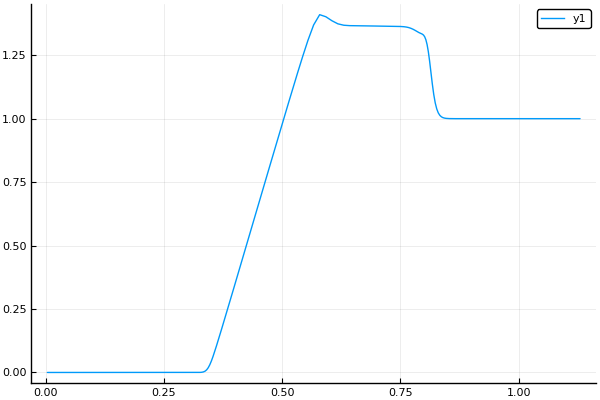

In [195]:
using Plots
plot(xL,uL)
#plot!(x1 .+0.5,U[:,1])

In [61]:
Output(x, y, u, v, p, ρ, mz)

In [97]:
floor(0.3)

0.0

##  Salzman 算例

$$ x(i,j) = (i-1)\Delta x +(11 - j) \text{sin}(0.01\pi (i-1))\Delta y, \quad y(i,j) = (j-1) \Delta y$$

<img src="mesh.png" width = "1000" height = "300" div align=center />

初始条件：

  $$ (\rho, u, p,e) = \left\{ \begin{aligned}
  (4.0,1.11,0.987,0.617) \quad  i < 5 \\
  (0.6667,0,2.667\times 10 ^{-5},1.0\times 10^{-4}) \quad i \ge 5\\
  \end{aligned}
  \right.$$ 

## 激波关系式


$$\rho_R(u_R - s)  = \rho_L(u_L -s) $$
$$\rho_R u_R(u_R -s) = \rho_Lu_L(u_L -s) + p_L -p_R$$
$$ \rho_RE_R(u_R -s) = \rho_LE_L(u_L -s) + p_Lu_L - u_Rp_R $$

$$e = \frac{p}{(\gamma -1)\rho} $$

In [219]:
using SymPy
@vars ρₗ ρᵣ pₗ pᵣ s eₗ eᵣ  uᵣ uₗ r 
exp1 = solve([ρᵣ*(uᵣ-s)-ρₗ*(uₗ-s),
       ρᵣ*uᵣ*(uᵣ-s)-ρₗ*uₗ*(uₗ-s)+pᵣ-pₗ,
       ρᵣ*(eᵣ+uᵣ^2/2)*(uᵣ-s)-ρₗ*(eₗ+uₗ^2/2)*(uₗ-s)-pₗ*uₗ+pᵣ*uᵣ,
        eₗ-pₗ/(r-1)/ρₗ,
        eᵣ-pᵣ/(r-1)/ρᵣ],[ρᵣ,pₗ,pᵣ,uₗ,eₗ])

2-element Array{NTuple{5,Sym},1}:
 (ρₗ, eᵣ*ρₗ*(r - 1), eᵣ*ρₗ*(r - 1), uᵣ, eᵣ)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 (ρₗ*(r - 1)*(2*eᵣ*r + s^2 - 2*s*uᵣ + uᵣ^2)/((r + 1)*(s - uᵣ)^2), -ρₗ*(r - 1)*(2*eᵣ*r + s^2 - 2*s*uᵣ + uᵣ^2)*(eᵣ*r^2 - 2*eᵣ*r + eᵣ - 2*s^2 + 4*s*uᵣ - 2*uᵣ^2)/((r + 1)^2*(s - uᵣ)^2), eᵣ*ρₗ*(r - 1)^2*(2*eᵣ*r + s^2 - 2*s*uᵣ + uᵣ^2)/((r + 1)*(s - uᵣ)^2), (-2*eᵣ*r^2 + 2*eᵣ*r + r*s*uᵣ - r*uᵣ^2 + 2*s^2 - 3*s*uᵣ + uᵣ^2)/((r + 1)*(s - uᵣ)), (-

In [232]:
ρᵣ = exp1[2][1](ρₗ=>4,uᵣ=>0, s=>1.333, eᵣ=> 1.e-4, r=>1.4)
pₗ = exp1[2][2](ρₗ=>4,uᵣ=>0, s=>1.333, eᵣ=> 1.e-4, r=>1.4)
pᵣ = exp1[2][3](ρₗ=>4,uᵣ=>0, s=>1.333, eᵣ=> 1.e-4, r=>1.4)
uₗ = exp1[2][4](ρₗ=>4,uᵣ=>0, s=>1.333, eᵣ=> 1.e-4, r=>1.4)
eₗ = exp1[2][5](ρₗ=>4,uᵣ=>0, s=>1.333, eᵣ=> 1.e-4, r=>1.4)

@show ρᵣ,pₗ,pᵣ,uₗ,eₗ

(ρᵣ, pₗ, pᵣ, uₗ, eₗ) = (0.666771719186361, 0.987311665966317, 2.66708687674544e-5, 1.11079832458115, 0.617069791228948)


(0.666771719186361, 0.987311665966317, 2.66708687674544e-5, 1.11079832458115, 0.617069791228948)

In [385]:
function init_salzmann()
    tt = 0.2
    
    cfl = 0.1
    γ = 1.4
    
    global problem = prb(tt,cfl,γ)
     
    I = 104
    J = 9
    dx = 1.04/I
    dy = 0.1/J
    
    
    Ip = (I+1)*(J+1) # Number of  points
    Ic = I*J  # number of cells
    
    global Tp = zeros(Int,Ic,4) #格点
    global Tc = zeros(Int,Ip,4) #点格
    
    #@show Tc, Ip
    global Tb = zeros(Int, I*2+J*2,3) #边界 
    
    IBL = J+1
    IBR = J+1
    IBU = I+1
    IBD = I+1
   # 点格表，格点表初始化 
    for i in 1:I 
        for j in 1:J
            ic = i+(j-1)*I
            Tp[ic,1] = i + (j-1)*(I+1)
            Tp[ic,2] = i+1 +(j-1)*(I+1)
            Tp[ic,3]=i+1+j*(I+1)
            Tp[ic,4]=i+j*(I+1) 
        end
    end
    
    for i = 1:I+1
        for j = 1:J+1
            ip = i+(j-1)*(I+1)
            Tc[ip,1] = i +(j-1)*I #(i,j)
            Tc[ip,2] = i-1+(j-1)*I #(i-1,j)
            Tc[ip,3] = i-1+(j-2)*I #(i-1,j-1)
            Tc[ip,4] = i+(j-2)*I   #(i,j-1)
            end
        end
    

# Bound 
  ib = 0
    for i = 1:I+1
        for j = 1:J+1
            if i == 1 || i== I+1 ||  j == 1 || j == J+1
                ib += 1
                ip =i+(j-1)*(I+1) 
                Tb[ib,1] = ip
                if i==1 
                   Tb[ib,3] = 1
                    Tc[ip,2] =0
                    Tc[ip,3] =0
                end   
                 if  i==I+1 
                    Tb[ib,3] = 1 #bound type 1:free 2: wall ..  Tb[:,2] y direction
                    Tc[ip,1] =0
                    Tc[ip,4] =0
                end
            
                if j==1 
                    Tb[ib,2] = 2
                    Tc[ip,3] = 0
                    Tc[ip,4] = 0
                end
                if j==J+1
                    Tb[ib,2] = 2
                    Tc[ip,1] = 0
                    Tc[ip,2] = 0
                end
            end
        end
    end

    #流场初始化 Init of the flow
    
    x = zeros(Float64,Ip)
    y = zeros(Float64,Ip)
    u = zeros(Float64,Ip)
    v = zeros(Float64,Ip)
    
    ρ = zeros(Float64,Ic)
    mz = zeros(Float64,Ic)
    p = zeros(Float64,Ic)
    Az= zeros(Float64,Ic)
    α = zeros(Float64,Ic)
    for i in 1:I+1
        for j = 1:J+1
            ip =i+(j-1)*(I+1)
            if i< 5
                x[ip] = (i-1)*dx
                y[ip] =(j-1)*dy
            else
                x[ip] = (i-1)*dx +(11-j)*sin(0.01π*(i-5))*dy
                y[ip] = (j-1)*dy
            end
            if i <2
                u[ip] = 1.11
            else
                u[ip] = 0
            end
            v[ip] = 0.0
        end
    end
    
    xz = zeros(Float64,4)
    yz = zeros(Float64,4) 
    for i in 1:I
        for j in 1:J
            ic = i+(j-1)*I
            xz[1:4] = x[Tp[ic,1:4]]
            yz[1:4] = y[Tp[ic,1:4]]
            A = A_z(xz,yz)
            Az[ic] = sum(A) #[1]+A[2]+A[3]+A[4]
            if i<2
                 p[ic] = 0.987
                ρ[ic] = 4.0
                mz[ic] = ρ[ic] * Az[ic]
               
            else
                p[ic] = 2.67e-5
                ρ[ic] = 0.6667
                mz[ic] = ρ[ic] * Az[ic]
            end
        end
    end
    
    return x,y,u,v,mz,p,ρ,Az,α,I,J
end

init_salzmann (generic function with 1 method)

In [386]:
x,y,u,v,mz,p,ρ,Az,α,I,J = init_salzmann()
u,v,x,y,p,ρ = TimeSolve(u, v, x, y, p, mz, ρ, α)
Output(I+1,J+1,x, y, u, v, p, ρ, mz)

0.0020260815296286915
0.0042746626048969175
0.0060397660344183425
0.008009050313405507
0.010003674904608292
0.012016559941369851
0.014049291343751014
0.01610800493000588
0.018201087290764906
0.02014950316725607
0.022172082155708157
0.024101323003301086
0.026127346515549963
0.028092853583736525
0.03001437759031805
0.032061150183386594
0.03408416706463074
0.03609390826066156
0.03809882386604256
0.0400909299583375
0.042063319392465534
0.04402073969236149
0.046114233306269986
0.04804634743126036
0.05009987970426143
0.05212753924756634
0.05413326164587552
0.05611974535603012
0.058092785260242606
0.06005787556792548
0.062022047616197486
0.06400251616610195
0.06612051747660098
0.06808546812867888
0.0700324674664497
0.07207216691631067
0.07408425046413812
0.07608534963557832
0.07803461400473238
0.08006754986920718
0.08207040211375027
0.08407852762373379
0.08600817111833844
0.08809908720914852
0.09003297107860196
0.09204225436485201
0.09401490252095142
0.09603084906090821
0.09802768117250722
0.

DomainError: DomainError with -0.004356582539167339:
sqrt will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).

x

In [271]:
ρ

1000-element Array{Float64,1}:
 4.0               
 0.6667            
 0.6667            
 0.6667            
 0.6667            
 0.6667            
 0.6667            
 0.6667            
 0.6667            
 0.6667            
 0.6667            
 0.6667            
 0.6667            
 ⋮                 
 0.6667            
 0.6666999999999998
 0.6667            
 0.6666999999999998
 0.6667            
 0.6667            
 0.6667            
 0.6667            
 0.6667            
 0.6667            
 0.6667            
 0.6667            

### chenjuan shuqiwang 

In [74]:
using Plots   

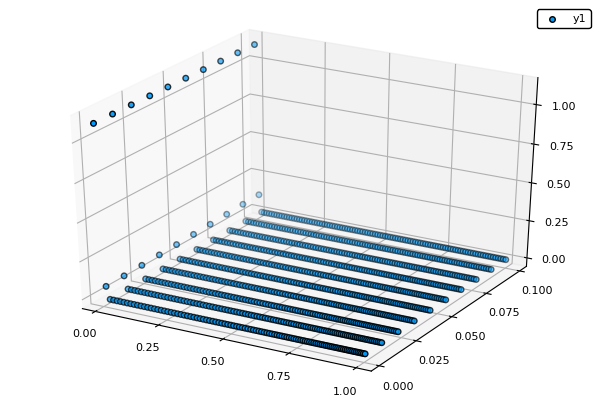

In [291]:
scatter3d(x,y,u)

In [101]:
- 0.9/0.55*400

-654.5454545454545